# Statistical Analysis

### import libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### load input data

In [4]:
df_data_training = pd.read_csv("RESULTS_sobolsampling-2048.csv")
#print(f'{df_data_training}')
df_data_training = df_data_training.drop(columns='Unnamed: 0')
#print(f'{df_data_training}')

colnames = df_data_training.iloc[0:6,0]
#print(f'{colnames}')
cols = []
for i in range(0,5):
    #print(f'{colnames[i]}')
    cols.append(colnames[i])
#print(f'{cols}')

data = []
for i in range(1, df_data_training.shape[1]):
    d = df_data_training.iloc[0:5,i]
    #print(f'd:\n{d}')
    tmp = []
    for j in range(0,5):
        tmp.append(d[j])
    data.append(tmp)    
    #if i == 2:
    #    break

#print(f'{data}')
df_data_training = pd.DataFrame(np.array(data), columns=[cols])
#print(f'{df_data_training}')

          SigC      SigH      EpsC      EpsH     density
0     0.329511  0.074231  1.036268  0.062599  891.797000
1     0.066754  0.316262  0.205940  0.119844    0.183657
2     0.193948  0.136800  0.751676  0.037376  664.747000
3     0.230588  0.235899  0.596203  0.100129  682.448000
4     0.242166  0.148891  0.406759  0.087550  688.667000
...        ...       ...       ...       ...         ...
2043  0.242035  0.235637  0.735539  0.137124  708.349000
2044  0.230760  0.148096  1.005841  0.111508  714.162000
2045  0.194069  0.189609  0.357464  0.056020    0.000000
2046  0.066912  0.095994  0.782125  0.108488  651.054000
2047  0.329646  0.259110  0.444702  0.043977  707.088000

[2048 rows x 5 columns]


### load testing data

In [5]:
## data set 1
df_data_testing_1 = pd.read_csv("RESULTS_Testing-1296.csv")
#print(f'{df_data_testing_1}')
#print(f'{df_data_testing_1.columns}')
df_data_testing_1 = df_data_testing_1.drop(columns='Unnamed: 0')
#print(f'{df_data_testing_1}')
#print(f'{df_data_testing_1.columns}')
#print(f'{df_data_testing_1.shape[1]}')

colnames = df_data_testing_1.iloc[0:5,0]
#print(f'{colnames}')
cols = []
for i in range(0,5):
    #print(f'{colnames[i]}')
    cols.append(colnames[i])
#print(f'{cols}')

data = []
for i in range(1, df_data_testing_1.shape[1]):
    d = df_data_testing_1.iloc[0:5,i]
    tmp = []
    for j in range(0,5):
        tmp.append(d[j])
    data.append(tmp)    
    #if i == 2:
    #    break

#print(f'{data}')
df_data_testing_1 = pd.DataFrame(np.array(data), columns=[cols])
#print(f'{df_data_testing_1}')

## data set 2
df_data_testing_2 = pd.read_csv("RESULTS_Training-2401.csv")
#print(f'{df_data_testing_2}')
#print(f'{df_data_testing_2.columns}')
df_data_testing_2 = df_data_testing_2.drop(columns='Unnamed: 0')
#print(f'{df_data_testing_2}')
#print(f'{df_data_testing_2.columns}')
#print(f'{df_data_testing_2.shape[1]}')

data = []
for i in range(1, df_data_testing_2.shape[1]):
    d = df_data_testing_2.iloc[0:5,i]
    tmp = []
    for j in range(0,5):
        tmp.append(d[j])
    data.append(tmp)    
    #if i == 2:
    #    break

#print(f'{data}')
df_data_testing_2 = pd.DataFrame(np.array(data), columns=[cols])
#print(f'{df_data_testing_2}')

### Exploratory Data Analysis (EDA)

In [7]:
eda_data_training = df_data_training.describe()
print(f'eda_data_training:\n{eda_data_training}')

eda_data_training:
              SigC         SigH         EpsC         EpsH      density
count  2048.000000  2048.000000  2048.000000  2048.000000  2048.000000
mean      0.200000     0.182000     0.657200     0.080000   647.442653
std       0.086624     0.078828     0.284645     0.034649   141.403946
min       0.050019     0.045562     0.164577     0.020042     0.000000
25%       0.125028     0.113733     0.410930     0.050020   643.818750
50%       0.199991     0.181994     0.657304     0.079993   664.107000
75%       0.274993     0.250261     0.903724     0.109995   710.089250
max       0.349960     0.318450     1.150096     0.139942   939.206000


### Correlation

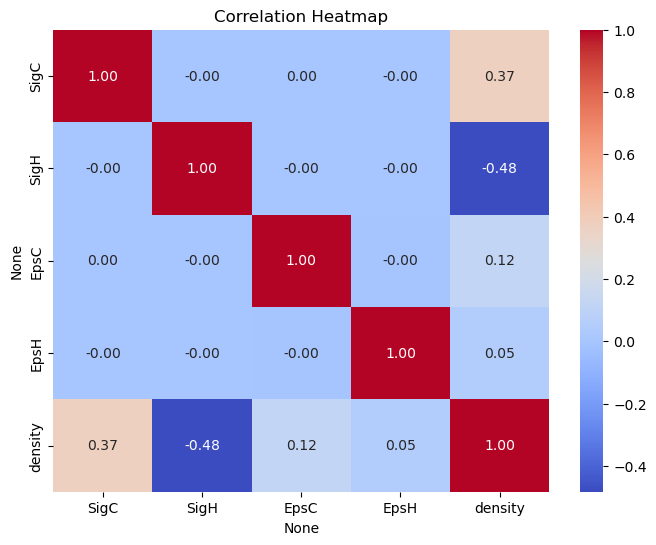

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df_data_training.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### outliers

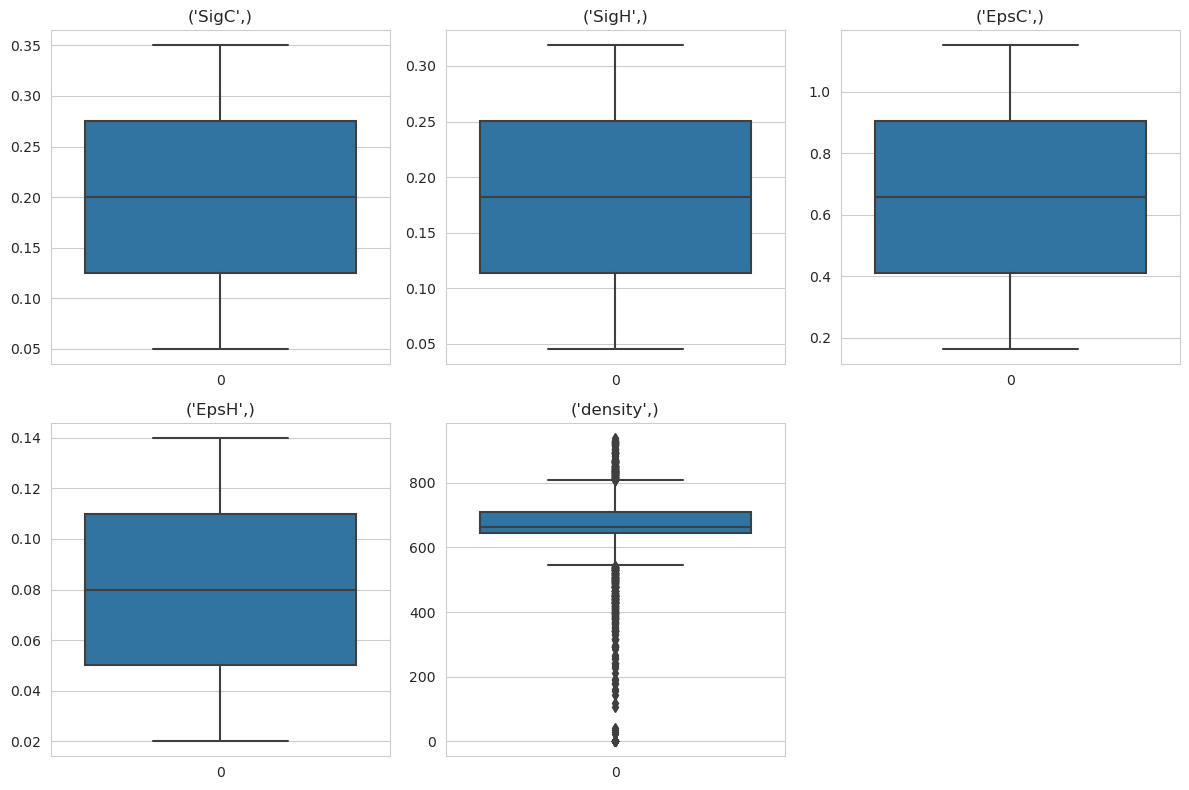

In [13]:
sns.set_style("whitegrid")
sns.color_palette("Set1")

plt.figure(figsize=(12, 8))
for i, column in enumerate(df_data_training.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df_data_training[column])
    plt.title(column)

plt.tight_layout()
plt.show()

### remove outliers ?

In [38]:
df_data_training_cleaned = df_data_training
print(f'{df_data_training_cleaned}')

for i, row in enumerate(df_data_training_cleaned.index):
    #print(f'row: {row}\n')
    #print(f'df_data_training_cleaned.loc[row].density:\n{df_data_training_cleaned.loc[row].density}')
    density = df_data_training_cleaned.loc[row].density
    #print(f'density: {density}')
    if density <= 550 or density >= 800:
        #print("miau")
        df_data_training_cleaned = df_data_training_cleaned.drop(index=row)
    
    #if row == 10:
        #break
        
print(f'{df_data_training_cleaned}')

          SigC      SigH      EpsC      EpsH     density
0     0.329511  0.074231  1.036268  0.062599  891.797000
1     0.066754  0.316262  0.205940  0.119844    0.183657
2     0.193948  0.136800  0.751676  0.037376  664.747000
3     0.230588  0.235899  0.596203  0.100129  682.448000
4     0.242166  0.148891  0.406759  0.087550  688.667000
...        ...       ...       ...       ...         ...
2043  0.242035  0.235637  0.735539  0.137124  708.349000
2044  0.230760  0.148096  1.005841  0.111508  714.162000
2045  0.194069  0.189609  0.357464  0.056020    0.000000
2046  0.066912  0.095994  0.782125  0.108488  651.054000
2047  0.329646  0.259110  0.444702  0.043977  707.088000

[2048 rows x 5 columns]
          SigC      SigH      EpsC      EpsH  density
2     0.193948  0.136800  0.751676  0.037376  664.747
3     0.230588  0.235899  0.596203  0.100129  682.448
4     0.242166  0.148891  0.406759  0.087550  688.667
5     0.128757  0.190416  0.989670  0.034993  660.728
6     0.115236  0.096

### eda cleaned

In [39]:
eda_data_training_cleaned = df_data_training_cleaned.describe()
print(f'eda_data_training_cleaned:\n{eda_data_training_cleaned}')

eda_data_training_cleaned:
              SigC         SigH         EpsC         EpsH      density
count  1558.000000  1558.000000  1558.000000  1558.000000  1558.000000
mean      0.190005     0.164404     0.637998     0.079785   676.451024
std       0.081588     0.068993     0.284342     0.034786    48.328798
min       0.050154     0.045562     0.164577     0.020042   550.758000
25%       0.120003     0.104672     0.391468     0.049484   649.865500
50%       0.189257     0.164165     0.626329     0.079924   668.337500
75%       0.257439     0.224736     0.883902     0.110041   700.949750
max       0.349601     0.314838     1.150096     0.139942   799.678000


### correlation cleaned

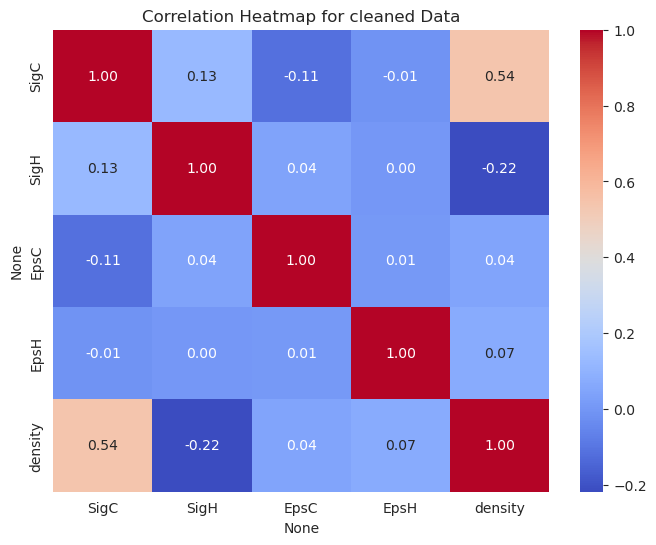

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(df_data_training_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for cleaned Data')
plt.show()

### outliers cleaned

KeyError: 0

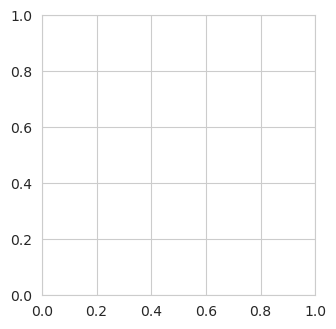

In [43]:
sns.set_style("whitegrid")
sns.color_palette("Set1")

plt.figure(figsize=(12, 8))
for i, column in enumerate(df_data_training_cleaned.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df_data_training_cleaned[column])
    plt.title(column)

plt.tight_layout()
plt.show()

## TMP Train Models with "cleaned" Data

In [44]:
# Torch
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

# for data preparation
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# other stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import date
import time

In [45]:
df_data_training = df_data_training_cleaned
print(f'{df_data_training}')

          SigC      SigH      EpsC      EpsH  density
2     0.193948  0.136800  0.751676  0.037376  664.747
3     0.230588  0.235899  0.596203  0.100129  682.448
4     0.242166  0.148891  0.406759  0.087550  688.667
5     0.128757  0.190416  0.989670  0.034993  660.728
6     0.115236  0.096286  0.426365  0.132460  649.748
...        ...       ...       ...       ...      ...
2042  0.128595  0.136526  0.645525  0.075425  651.258
2043  0.242035  0.235637  0.735539  0.137124  708.349
2044  0.230760  0.148096  1.005841  0.111508  714.162
2046  0.066912  0.095994  0.782125  0.108488  651.054
2047  0.329646  0.259110  0.444702  0.043977  707.088

[1558 rows x 5 columns]


In [46]:
## data set 1
df_data_testing_1 = pd.read_csv("RESULTS_Testing-1296.csv")
#print(f'{df_data_testing_1}')
#print(f'{df_data_testing_1.columns}')
df_data_testing_1 = df_data_testing_1.drop(columns='Unnamed: 0')
#print(f'{df_data_testing_1}')
#print(f'{df_data_testing_1.columns}')
#print(f'{df_data_testing_1.shape[1]}')

colnames = df_data_testing_1.iloc[0:5,0]
#print(f'{colnames}')
cols = []
for i in range(0,5):
    #print(f'{colnames[i]}')
    cols.append(colnames[i])
#print(f'{cols}')

data = []
for i in range(1, df_data_testing_1.shape[1]):
    d = df_data_testing_1.iloc[0:5,i]
    tmp = []
    for j in range(0,5):
        tmp.append(d[j])
    data.append(tmp)    
    #if i == 2:
    #    break

#print(f'{data}')
df_data_testing_1 = pd.DataFrame(np.array(data), columns=[cols])
print(f'{df_data_testing_1}')

## data set 2
df_data_testing_2 = pd.read_csv("RESULTS_Training-2401.csv")
#print(f'{df_data_testing_2}')
#print(f'{df_data_testing_2.columns}')
df_data_testing_2 = df_data_testing_2.drop(columns='Unnamed: 0')
#print(f'{df_data_testing_2}')
#print(f'{df_data_testing_2.columns}')
#print(f'{df_data_testing_2.shape[1]}')

data = []
for i in range(1, df_data_testing_2.shape[1]):
    d = df_data_testing_2.iloc[0:5,i]
    tmp = []
    for j in range(0,5):
        tmp.append(d[j])
    data.append(tmp)    
    #if i == 2:
    #    break

#print(f'{data}')
df_data_testing_2 = pd.DataFrame(np.array(data), columns=[cols])
print(f'{df_data_testing_2}')

       SigC    SigH    EpsC  EpsH  density
0     0.075  0.0683  0.2465  0.03  640.872
1     0.075  0.0683  0.2465  0.05  634.243
2     0.075  0.0683  0.2465  0.07  626.397
3     0.075  0.0683  0.2465  0.09  631.671
4     0.075  0.0683  0.2465  0.11  639.387
...     ...     ...     ...   ...      ...
1291  0.325  0.2958   1.068  0.05  446.143
1292  0.325  0.2958   1.068  0.07  446.143
1293  0.325  0.2958   1.068  0.09  446.143
1294  0.325  0.2958   1.068  0.11  446.143
1295  0.325  0.2958   1.068  0.13  446.143

[1296 rows x 5 columns]
      SigC    SigH    EpsC  EpsH  density
0     0.05  0.0455  0.1643  0.02  634.421
1     0.05  0.0455  0.1643  0.04  641.987
2     0.05  0.0455  0.1643  0.06  638.865
3     0.05  0.0455  0.1643  0.08   640.72
4     0.05  0.0455  0.1643   0.1  638.745
...    ...     ...     ...   ...      ...
2396  0.35  0.3185  1.1501  0.06  446.143
2397  0.35  0.3185  1.1501  0.08  446.143
2398  0.35  0.3185  1.1501   0.1  446.143
2399  0.35  0.3185  1.1501  0.12  446.1

In [47]:
df_x_train = df_data_training[['SigC', 'SigH', 'EpsC', 'EpsH']]
x_train = torch.Tensor(df_x_train.to_numpy().astype(float))

df_y_train = df_data_training['density']
y_train = torch.Tensor(df_y_train.to_numpy().astype(float))

train_data = TensorDataset(x_train, y_train)

# setting batch size and dataloader
batch_size = len(x_train)
train_dl = DataLoader(train_data, batch_size, shuffle=True)

In [48]:
## data set 1 
df_x_test_1 = df_data_testing_1[['SigC', 'SigH', 'EpsC', 'EpsH']]
x_test_1 = torch.Tensor(df_x_test_1.to_numpy().astype(float))

df_y_test_1 = df_data_testing_1['density']
y_test_1 = torch.Tensor(df_y_test_1.to_numpy().astype(float))

test_data_1 = TensorDataset(x_test_1, y_test_1)

## data set 2
df_x_test_2 = df_data_testing_2[['SigC', 'SigH', 'EpsC', 'EpsH']]
x_test_2 = torch.Tensor(df_x_test_2.to_numpy().astype(float))

df_y_test_2 = df_data_testing_2['density']
y_test_2 = torch.Tensor(df_y_test_2.to_numpy().astype(float))

test_data_2 = TensorDataset(x_test_2, y_test_2)

In [49]:
models = []
model_1 = net = torch.nn.Sequential(
        torch.nn.Linear(4, 10),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(10, 1),
)# 50 weights
models.append(model_1)

model_2 = net = torch.nn.Sequential(
        torch.nn.Linear(4, 50),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(50, 1),
)# 250 weights
models.append(model_2)

model_3 = net = torch.nn.Sequential(
        torch.nn.Linear(4, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 1),
)# 500 weights
models.append(model_3)

model_4 = net = torch.nn.Sequential(
        torch.nn.Linear(4, 10),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(10, 50),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(50, 1),
)# 590 weights
models.append(model_4)

model_5 = net = torch.nn.Sequential(
        torch.nn.Linear(4, 50),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(50, 10),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(10, 1),
)# 710 weights
models.append(model_5)

model_6 = net = torch.nn.Sequential(
        torch.nn.Linear(4, 10),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(10, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 1),
)# 1140 weights
models.append(model_6)

model_7 = net = torch.nn.Sequential(
        torch.nn.Linear(4, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 10),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(10, 1),
)# 1410 weights
models.append(model_7)

model_8 = net = torch.nn.Sequential(
        torch.nn.Linear(4, 50),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(50, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 1),
)# 5300 weights (OVERFIT?!)
models.append(model_8)

model_9 = net = torch.nn.Sequential(
        torch.nn.Linear(4, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 50),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(50, 1),
)# 5430 weights (OVERFIT?!)
models.append(model_9)

/home/rstric3m/anaconda3/lib/python3.11/site-packages/torch/autograd/__init__.py:266: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


model_1 - epoch [1/10000], loss: 459930.6875
model_1 - epoch [1001/10000], loss: 6130.7466
model_1 - epoch [2001/10000], loss: 2673.9170
model_1 - epoch [3001/10000], loss: 1719.0011
model_1 - epoch [4001/10000], loss: 1442.6913
model_1 - epoch [5001/10000], loss: 1404.5238
model_1 - epoch [6001/10000], loss: 1402.1766
model_1 - epoch [7001/10000], loss: 1402.1438
model_1 - epoch [8001/10000], loss: 1402.1438
model_1 - epoch [9001/10000], loss: 1402.1438
model_2 - epoch [1/10000], loss: 460015.6875
model_2 - epoch [1001/10000], loss: 1795.5975
model_2 - epoch [2001/10000], loss: 1406.2949
model_2 - epoch [3001/10000], loss: 1402.1483
model_2 - epoch [4001/10000], loss: 1402.1436
model_2 - epoch [5001/10000], loss: 1402.1438
model_2 - epoch [6001/10000], loss: 1402.1436
model_2 - epoch [7001/10000], loss: 1402.1436
model_2 - epoch [8001/10000], loss: 1402.1438
model_2 - epoch [9001/10000], loss: 1402.1436
model_3 - epoch [1/10000], loss: 460316.5000
model_3 - epoch [1001/10000], loss: 1

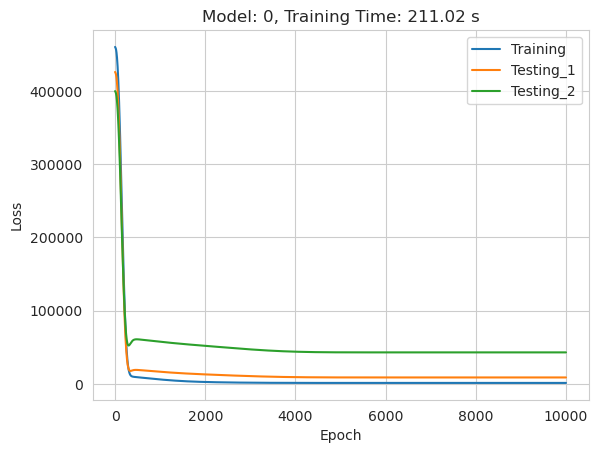

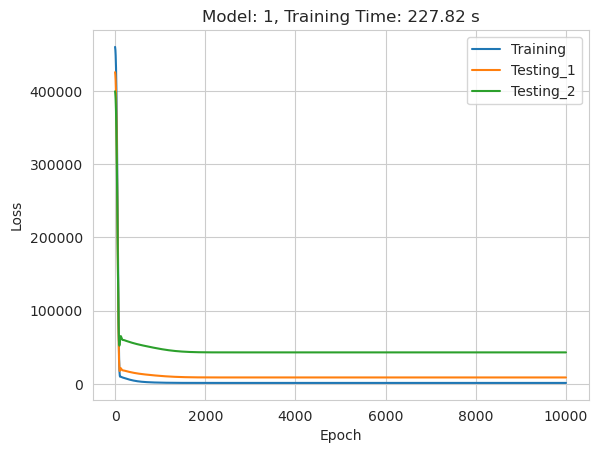

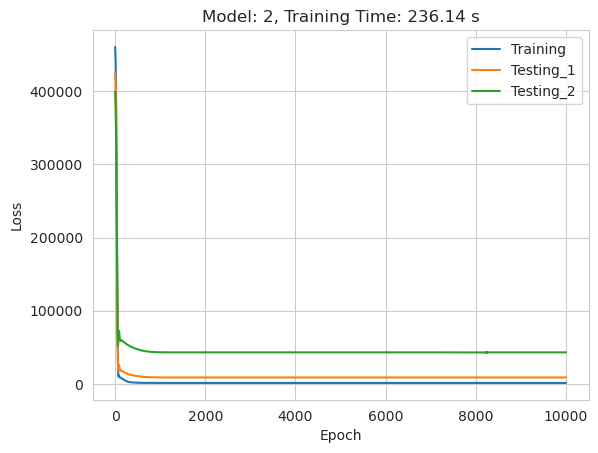

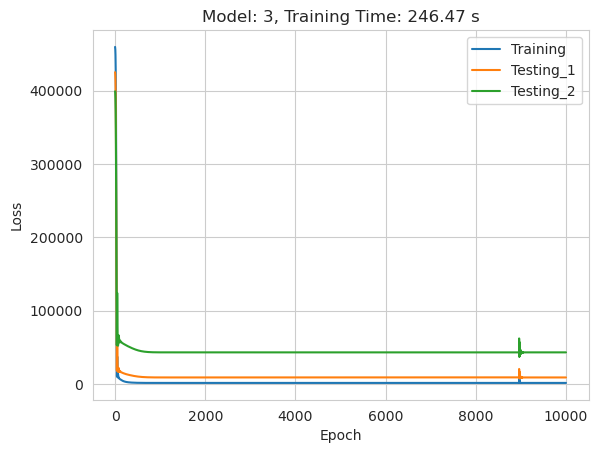

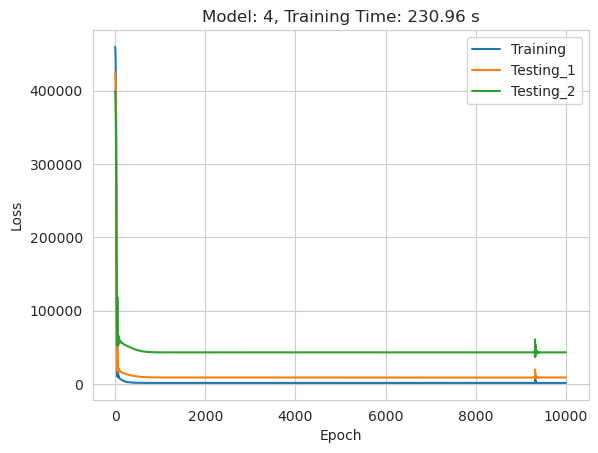

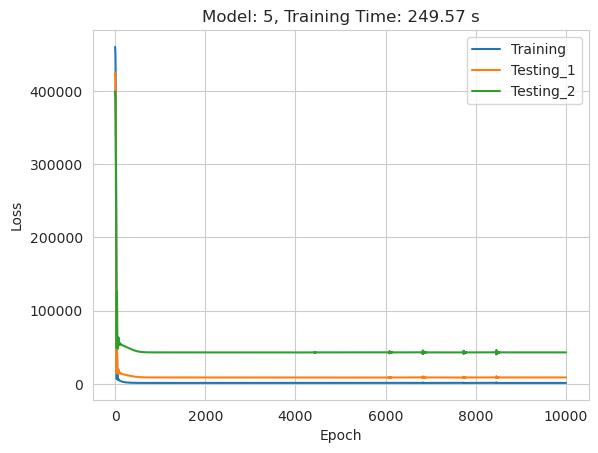

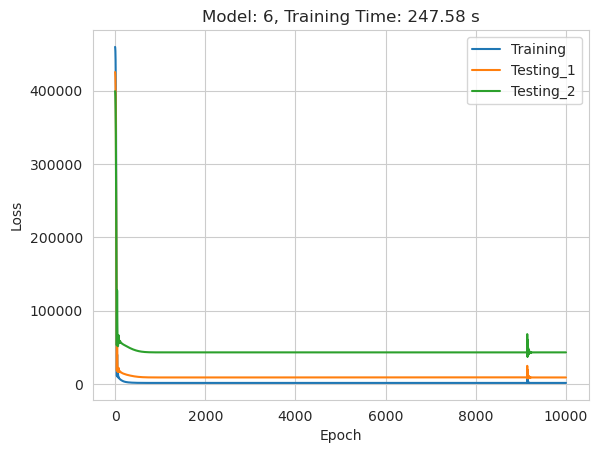

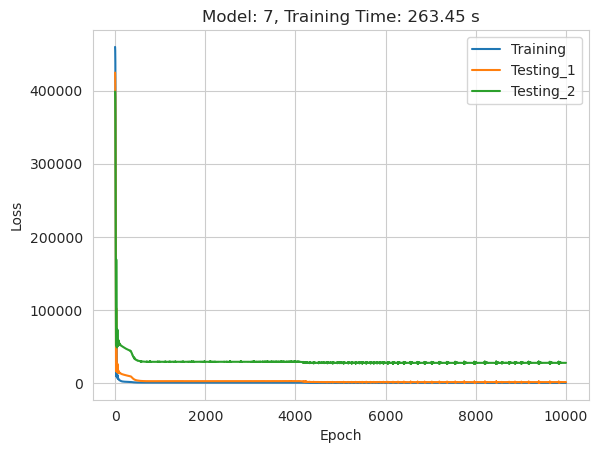

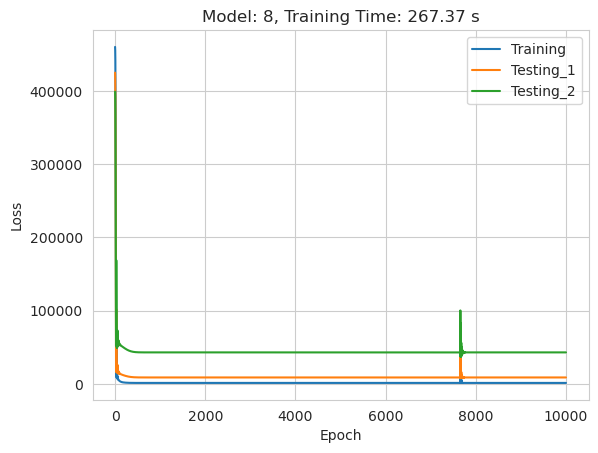

In [50]:
num_epochs = 10000

training_stats = []
timings = []

testing_stats_1 = []
testing_stats_2 = []

model_number = 0

for model in models:
    model_number = model_number + 1 
    this_stats_train = []
    this_stats_test_1 = []
    this_stats_test_2 = []
    
    loss_fn = torch.nn.MSELoss()
    # optimizer = torch.optim.Adam(model.parameters(), lr=lr_optuna)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.025)
    this_time_start = time.time()
    

    for epoch in range(num_epochs):
        for step, (xb, yb) in enumerate(train_dl):
            pred_train = model(xb)
            loss_train = loss_fn(pred_train, yb)

            optimizer.zero_grad()
            loss_train.backward()
            optimizer.step()

        this_stats_train.append([epoch+1, loss_train.item()])
        
        pred_test_1 = model(x_test_1)
        loss_test_1 = loss_fn(pred_test_1, y_test_1)
        this_stats_test_1.append([epoch+1, loss_test_1.item()])
        
        pred_test_2 = model(x_test_2)
        loss_test_2 = loss_fn(pred_test_2, y_test_2)
        this_stats_test_2.append([epoch+1, loss_test_2.item()])
        if epoch%1000 == 0:
            print(f'model_{model_number} - epoch [{epoch+1}/{num_epochs}], loss: {loss_train.item():.4f}')
            
    #print(f'this_stats:\n{this_stats_train}')
    training_stats.append(this_stats_train)
    testing_stats_1.append(this_stats_test_1)
    testing_stats_2.append(this_stats_test_2)
    this_time_end = time.time()
    this_time = this_time_end - this_time_start
    timings.append(this_time)
    #if model_number == 3:
    #    break
#print(f'training_stats:\n{training_stats}')
#print(f'testing_stats_1:\n{testing_stats_1}')
#print(f'testing_stats_2:\n{testing_stats_2}')
#print(f'time:\n{time}')

for model_number in range(0, len(training_stats)):
    x = []
    y_train = []
    y_test_1 = []
    y_test_2 = []
    for epoch in range(0, len(training_stats[model_number])):
        #print(training_stats[model_number][epoch])
        x.append(int(epoch))
        y_train.append(float(training_stats[model_number][epoch][1]))
        y_test_1.append(float(testing_stats_1[model_number][epoch][1]))
        y_test_2.append(float(testing_stats_2[model_number][epoch][1]))
    
    plt.figure()
    plt.plot(x, y_train, label='Training')
    plt.plot(x, y_test_1, label='Testing_1')
    plt.plot(x, y_test_2, label='Testing_2')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Model: {model_number}, Training Time: {timings[model_number]:.2f} s')
    #plt.show()
    plt.savefig(f'Epoch-VS-Loss_Training_Model-{model_number}_cleaned-data.png')
    #plt.savefig(f'Epoch-VS-Loss_Training_Model-{model_number}.pdf')

    #break
#plt.plot(training_stats[0])
#plt.show()

#print(f'{learning_stats}')
df_training_stats = pd.DataFrame(training_stats)
#print(f'{df_learning_stats}')
df_training_stats.to_csv(f'{date.today()}_training_stats_cleaned-data.csv')

df_testing_stats_1 = pd.DataFrame(testing_stats_1)
df_testing_stats_1.to_csv(f'{date.today()}_testing_stats_1_cleaned-data.csv')

df_testing_stats_2 = pd.DataFrame(testing_stats_2)
df_testing_stats_2.to_csv(f'{date.today()}_testing_stats_2_cleaned-data.csv')

for i in range(len(models)):
    #print(f'{date.today()} model: {models[i]}')
    ## save model sates
    #torch.save(model.state_dict(), f'tmp_model-5_{loss:.4f}.pt')
    ## save full model
    torch.save(models[i], f'{date.today()}_full_model_{i}_cleaned-data.pt')